## Using the Sepal and Petal Length, and Width to Predict Iris Species.

In [1]:
%matplotlib inline
from sklearn import linear_model
import statsmodels.formula.api as smf
from IPython.display import display
import numpy as np
import pandas as pd
import scipy
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import time
from sklearn.ensemble import RandomForestClassifier

import io
import graphviz
import pydotplus
from scipy import misc
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
## Loading the Iris file. 
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
## Doing a test size of 20%, which is 30 test. 
train, test = train_test_split(df, test_size=.2)

In [4]:
print('Training size: {}; Test size: {}'.format(len(train), len(test)))

Training size: 120; Test size: 30


In [5]:
sns.set_style("white")

In [23]:
## Determining the result of the Iris Species via their Length and Width.
Setosa_Sep_Len = df[df['Species'] == "Iris-setosa"]["SepalLengthCm"]
Versi_Sep_Len = df[df['Species'] == "Iris-versicolor"]["SepalLengthCm"]
Virgin_Sep_Len = df[df['Species'] == "Iris-virginica"]["SepalLengthCm"]

Setosa_Sep_Wid = df[df['Species'] == "Iris-setosa"]["SepalWidthCm"]
Versi_Sep_Wid = df[df['Species'] == "Iris-versicolor"]["SepalWidthCm"]
Virgin_Sep_Wid = df[df['Species'] == "Iris-virginica"]["SepalWidthCm"]

Setosa_Pet_Len = df[df['Species'] == "Iris-setosa"]["PetalLengthCm"]
Versi_Pet_Len = df[df['Species'] == "Iris-versicolor"]["PetalLengthCm"]
Virgin_Pet_Len = df[df['Species'] == "Iris-virginica"]["PetalLengthCm"]

Setosa_Pet_Wid = df[df['Species'] == "Iris-setosa"]["PetalWidthCm"]
Versi_Pet_Wid = df[df['Species'] == "Iris-versicolor"]["PetalWidthCm"]
Virgin_Pet_Wid = df[df['Species'] == "Iris-virginica"]["PetalWidthCm"]

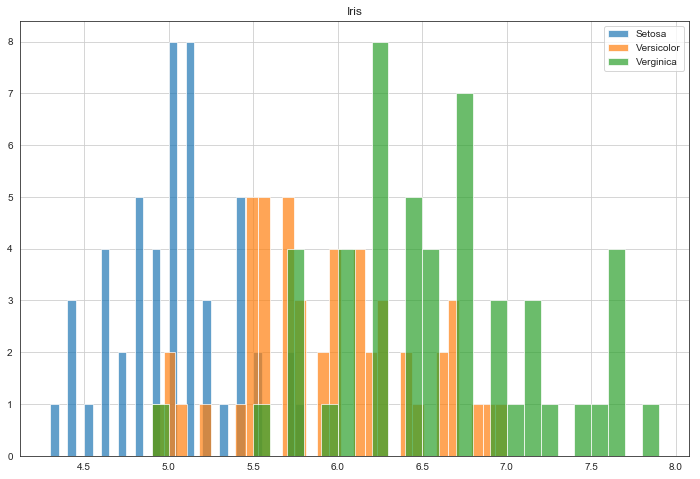

In [24]:
## The graph below shows if the Iris Species are very similar or not similar to each other. 
## Of course, less similar, then it easier for us to predict accurately. 
fig = plt.figure(figsize=(12, 8))
plt.title("Iris")
Setosa_Sep_Len.hist(alpha = 0.7, bins=30, label='Setosa')
Versi_Sep_Len.hist(alpha = 0.7, bins=30, label='Versicolor')
Virgin_Sep_Len.hist(alpha = 0.7, bins=30, label='Verginica')
plt.legend(loc= "upper right")

C:\Users\cvo-admin\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\cvo-admin\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\cvo-admin\App

--- 0.0 seconds ---


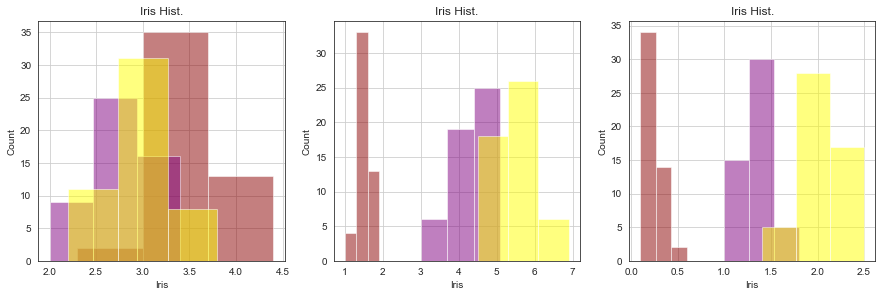

In [8]:
fig1 = plt.figure(figsize = (15,15))

## Iris-Virginica
ax1 = fig1.add_subplot(331)
ax1.set_xlabel('Iris')
ax1.set_ylabel('Count')
ax1.set_title('Iris Hist.')
Setosa_Sep_Wid.hist(alpha=0.5, bins= 3, color='darkred')
ax2 = fig1.add_subplot(331)
Versi_Sep_Wid.hist(alpha=0.5, bins= 3, color='purple')
ax3 = fig1.add_subplot(331)
Virgin_Sep_Wid.hist(alpha=0.5, bins= 3, color='yellow')

ax4 = fig1.add_subplot(332)
ax4.set_xlabel('Iris')
ax4.set_ylabel('Count')
ax4.set_title('Iris Hist.')
Setosa_Pet_Len.hist(alpha=0.5, bins= 3, color='darkred')
ax5 = fig1.add_subplot(332)
Versi_Pet_Len.hist(alpha=0.5, bins= 3, color='purple')
ax6 = fig1.add_subplot(332)
Virgin_Pet_Len.hist(alpha=0.5, bins= 3, color='yellow')

ax7 = fig1.add_subplot(333)
ax7.set_xlabel('Iris')
ax7.set_ylabel('Count')
ax7.set_title('Iris Hist.')
Setosa_Pet_Wid.hist(alpha=0.5, bins= 3, color='darkred')
ax8 = fig1.add_subplot(333)
Versi_Pet_Wid.hist(alpha=0.5, bins= 3, color='purple')
ax9 = fig1.add_subplot(333)
Virgin_Pet_Wid.hist(alpha=0.5, bins= 3, color='yellow')

start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

In [9]:
c = DecisionTreeClassifier(min_samples_split=20)

In [10]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [11]:
X_train = train[features]
y_train = train['Species']

X_test = test[features]
y_test = test['Species']

In [12]:
dt = c.fit(X_train, y_train)

In [13]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20, 20)
    plt.imshow(img)

C:\Users\cvo-admin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


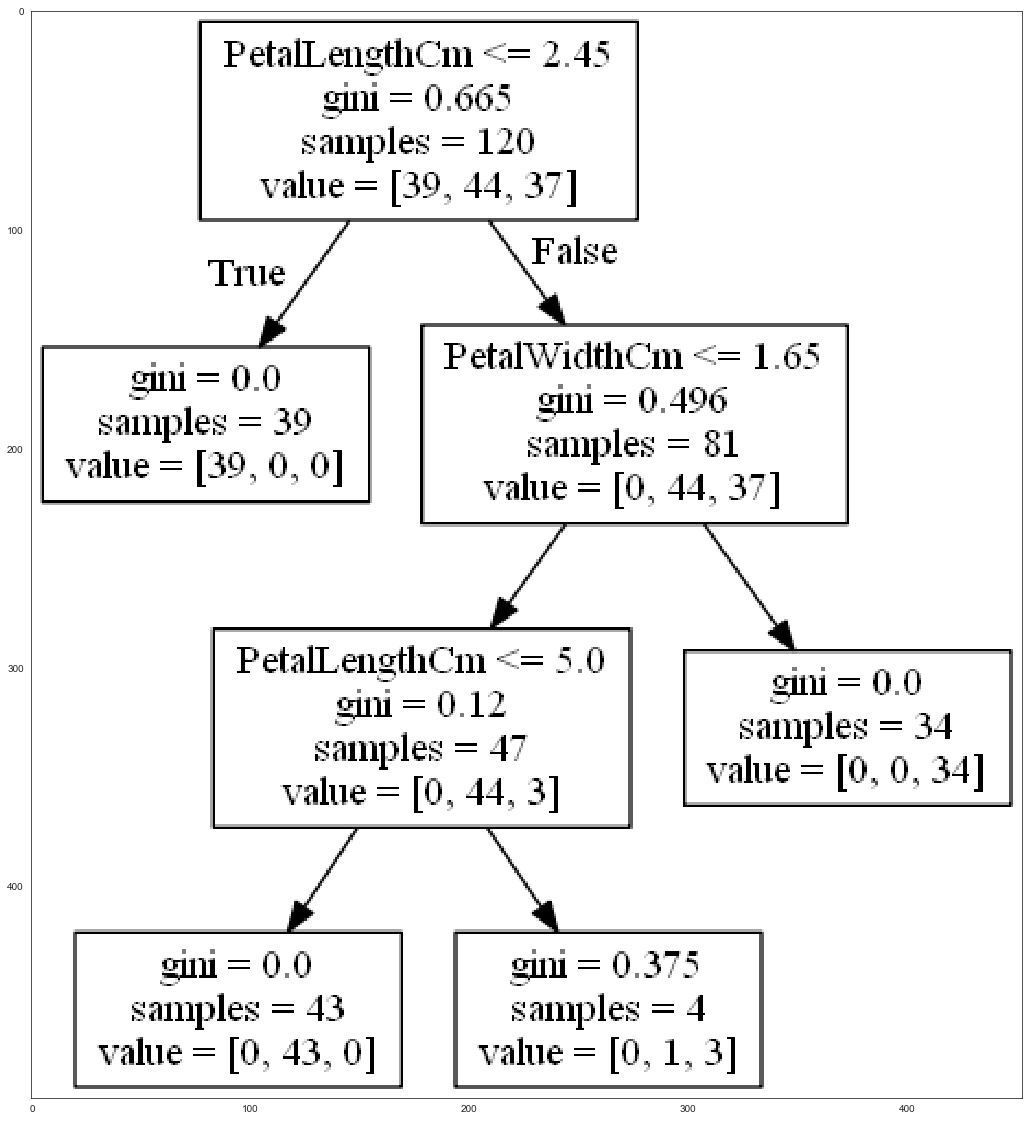

In [25]:
## showing our Decision Tree, for a more clear and precise image of our prediction.
show_tree(dt, features, 'decision_trees.png')

In [26]:
## We are predicting our accuracy rate. 
y_pred = c.predict(X_test)

In [16]:
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
## Our accuracy rate is 90%. 
score = accuracy_score(y_test, y_pred) * 100
print (score)

90.0


In [27]:
## We use crosstab to use which Iris Species we might miss or need work on. 
## In this case, our prediction needs improvement on Iris-Virginica and Iris-versicolor. 
pd.crosstab(test['Species'], y_pred, rownames=['Actual Species'], colnames=["Predicted Species"])

Predicted Species,Iris-setosa,Iris-versicolor,Iris-virginica
Actual Species,,,
Iris-setosa,2,2,5
Iris-versicolor,5,1,5
Iris-virginica,4,2,4


Our prediction have a success rate of 90% to predict the right Iris flower. Our prediction needs approvement on Versicolor Iris and virginica Iris. I believe because of their petal and sepal's length and width are so similar, it might have caused the wrong prediction. But overall, the percentage is very good!

Decision Tree itself is not very accurate and very limited on what it can run and easy to be Overfit. But with Random Forest, it become more flexible and help reduce Overfitting and make it work very well with all data.

And since this is a small dataset, the run time is 0 seconds.